# CRW results -- graphs and slope-elevation testing

In [1]:
# Dave Hunt
# University of Washington
# March 27, 2021

# This notebook plots patch encounter data generated from sets of correlated random walks (~100 walks x 10,000 steps) 
# at varying concentrations, utilizing the CRWutils.py module

#  CRW/ 
#    │
#    ├──src/
#    │   └──CRWutils.py
#    │
#    ├──notebooks/
#    │   └── CRW results.ipynb
#    │
#    ├──data/
#    │   └── all csv results *.csv from random walks
#    │
#    └──graphs/
#        └── all graphs created from csv data
#

# Copyright (c) 2021, David Hunt
# All rights reserved.

# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree. 

This notebook uses the results from my CRW simulator notebook (in the form of .csv files) and plots patch graphs.  Then the linear regression lines are compared for significance using methods from Zar (2010).

Zar, J., (2010), Biostatistical Analysis, 5th Ed., Pearson, Chap 18

In [2]:
%cd d:\\dev\Python\CRW\src

d:\dev\Python\CRW\src


In [3]:
# included libraries
import sys
import numpy as np
import pandas as pd
import CRWutils as crw

In [4]:
%cd d:\\dev\Python\CRW

d:\dev\Python\CRW


In [5]:
# read in the random walk results
df_all = pd.read_csv('data\crw_walk_results_rho_025.csv')  

In [6]:
df_all

,patch-size,x-offset,y-offset,distance,tally,step_sum,avg,total_steps
0,1,2,2,2.83,39,31475,807.051282,303613
1,1,3,3,4.24,37,25255,682.567568,264915
2,1,4,4,5.66,38,21930,577.105263,277202
3,1,5,5,7.07,36,49474,1374.277778,324497
4,1,6,6,8.49,37,26143,706.567568,300276
...,...,...,...,...,...,...,...,...
841,9,95,95,123.04,3,14233,4744.333333,494392
842,9,96,96,124.45,0,0,0.000000,490786
843,9,97,97,125.87,2,4786,2393.000000,446153
844,9,98,98,127.28,1,8645,8645.000000,436070


In [7]:
rho = 0.25

In [8]:
# separate out each patch-size results from the total results (p1 = 1x1, p2 = 2x2, etc.) 
# and remove distances with no encounters (tally == 0)
p1 = df_all.loc[(df_all['patch-size'] == 1) & (df_all['tally'] > 0)]
p2 = df_all.loc[(df_all['patch-size'] == 2) & (df_all['tally'] > 0)]
p3 = df_all.loc[(df_all['patch-size'] == 3) & (df_all['tally'] > 0)]
p4 = df_all.loc[(df_all['patch-size'] == 4) & (df_all['tally'] > 0)]
p5 = df_all.loc[(df_all['patch-size'] == 5) & (df_all['tally'] > 0)]
p6 = df_all.loc[(df_all['patch-size'] == 6) & (df_all['tally'] > 0)]
p7 = df_all.loc[(df_all['patch-size'] == 7) & (df_all['tally'] > 0)]
p8 = df_all.loc[(df_all['patch-size'] == 8) & (df_all['tally'] > 0)]
p9 = df_all.loc[(df_all['patch-size'] == 9) & (df_all['tally'] > 0)]

In [9]:
# further separate out the x, log(x), and y variables from each patch group
x1 = p1['distance'].tolist()
x2 = p2['distance'].tolist()
x3 = p3['distance'].tolist()
x4 = p4['distance'].tolist()
x5 = p5['distance'].tolist()
x6 = p6['distance'].tolist()
x7 = p7['distance'].tolist()
x8 = p8['distance'].tolist()
x9 = p9['distance'].tolist()

x1ln = np.log(x1)
x2ln = np.log(x2)
x3ln = np.log(x3)
x4ln = np.log(x4)
x5ln = np.log(x5)
x6ln = np.log(x6)
x7ln = np.log(x7)
x8ln = np.log(x8)
x9ln = np.log(x9)

y1 = p1['tally'].tolist()
y2 = p2['tally'].tolist()
y3 = p3['tally'].tolist()
y4 = p4['tally'].tolist()
y5 = p5['tally'].tolist()
y6 = p6['tally'].tolist()
y7 = p7['tally'].tolist()
y8 = p8['tally'].tolist()
y9 = p9['tally'].tolist()

In [10]:
type(x1)

list

In [11]:
print(sum(y1))
print(sum(y2))
print(sum(y3))
print(sum(y4))
print(sum(y5))
print(sum(y6))
print(sum(y7))
print(sum(y8))
print(sum(y9))

855
1287
1490
1562
1705
1751
1880
1910
1932


# Graph Results

d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128
d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128


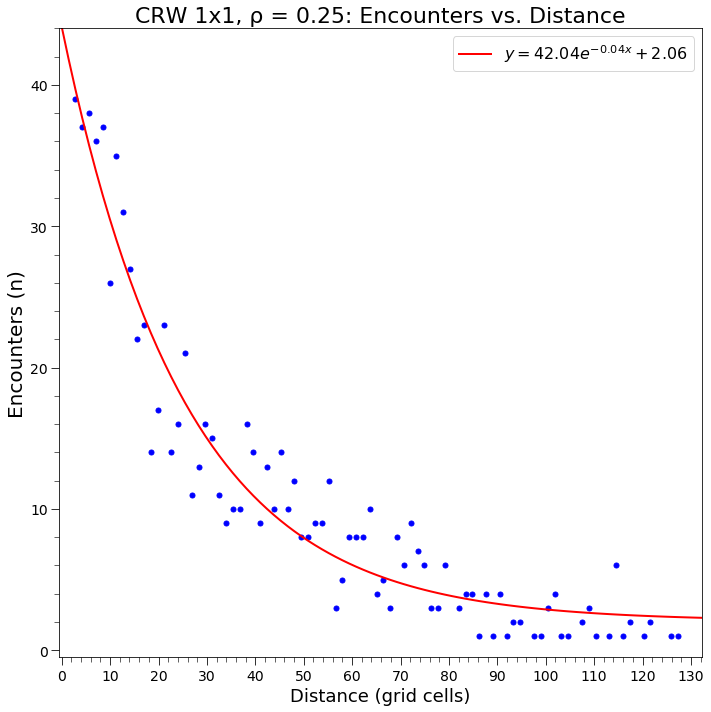

In [12]:
crw.printDecayGraph(x1, y1, '1x1, ' + chr(961) + ' = ' + str(rho))

slope = -11.42 (+/-) 0.38
y-intercept = 54.46 (+/-) 1.49


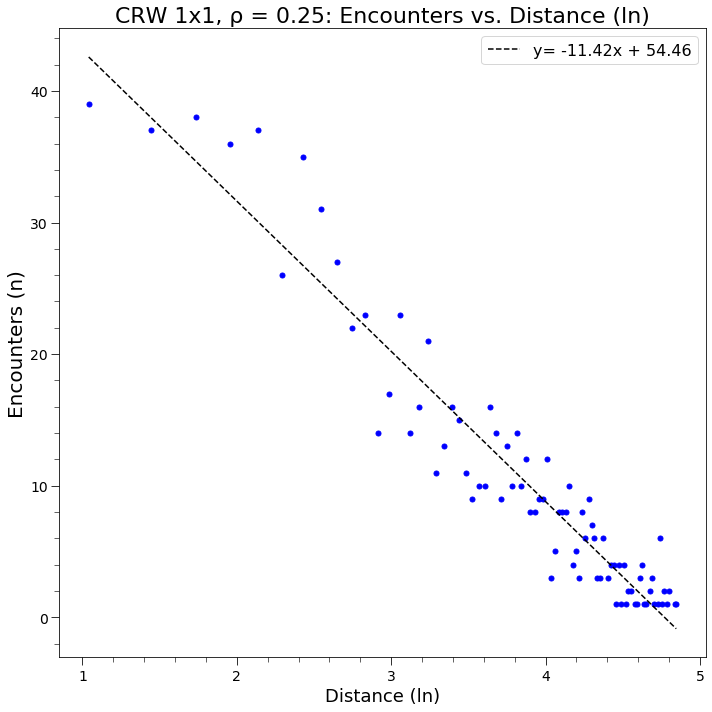

In [13]:
crw.printSemiLogGraph(x1, y1, '1x1, ' + chr(961) + ' = ' + str(rho))

In [14]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x1ln, y1)
print(slope, intercept, r_value, p_value, std_err)

-11.418400788558154 54.46406762819484 -0.9592002024367592 1.191633545508594e-45 0.37628719548789435


slope = -15.77 (+/-) 0.44

d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128
d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128



y-intercept = 76.42 (+/-) 1.77


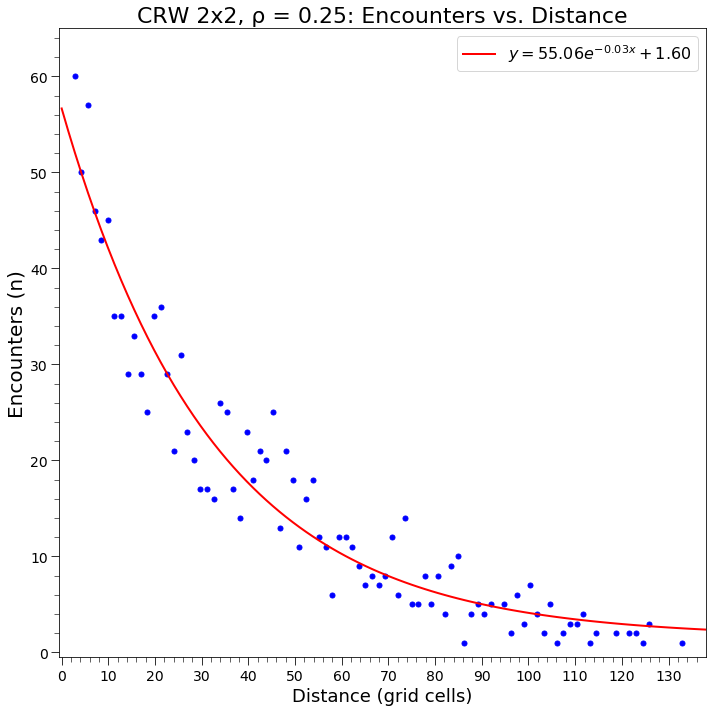

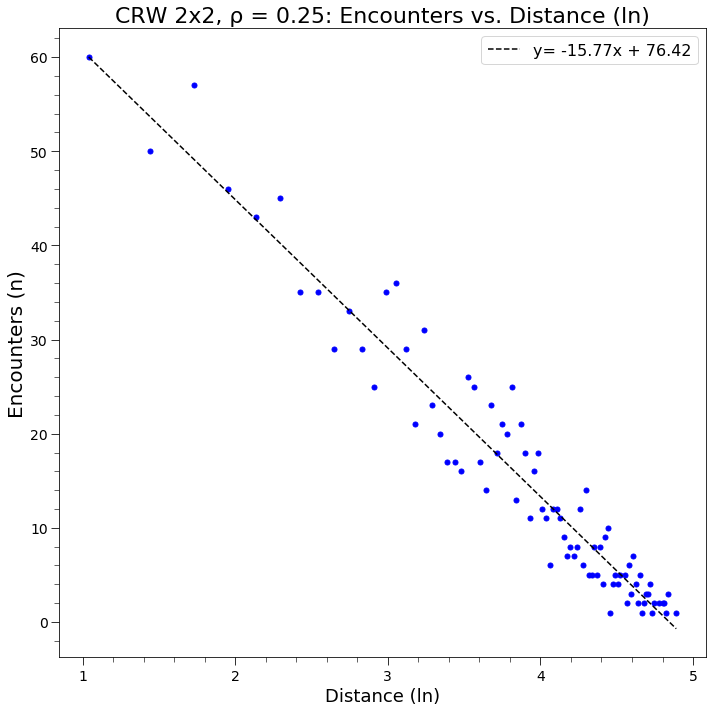

In [15]:
crw.printDecayGraph(x2, y2, '2x2, ' + chr(961) + ' = ' + str(rho))
crw.printSemiLogGraph(x2, y2, '2x2, ' + chr(961) + ' = ' + str(rho))

In [16]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x2ln, y2)
print(slope, intercept, r_value, p_value, std_err)

-15.774641329462256 76.42055486551648 -0.9686616539079125 5.6213732347864766e-52 0.4439886996999595


slope = -19.63 (+/-) 0.41

d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128



y-intercept = 93.70 (+/-) 1.65


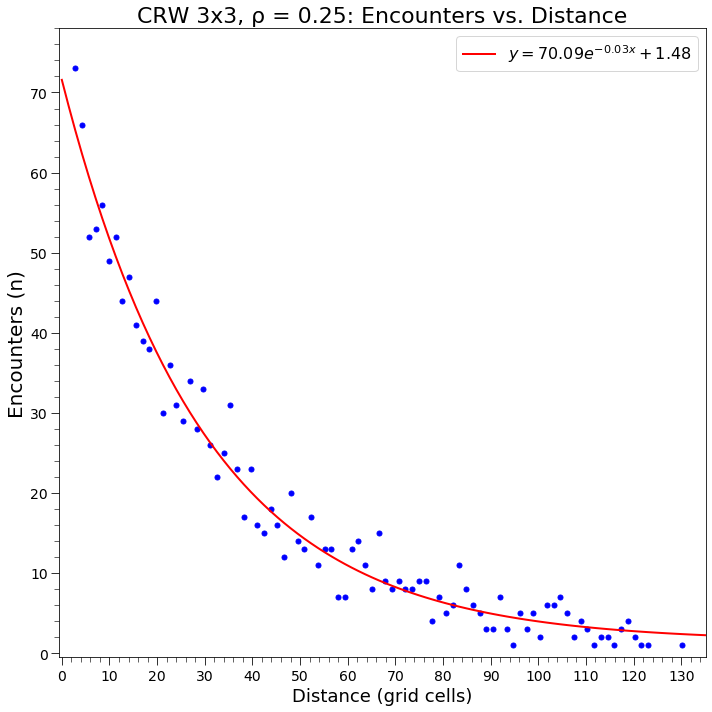

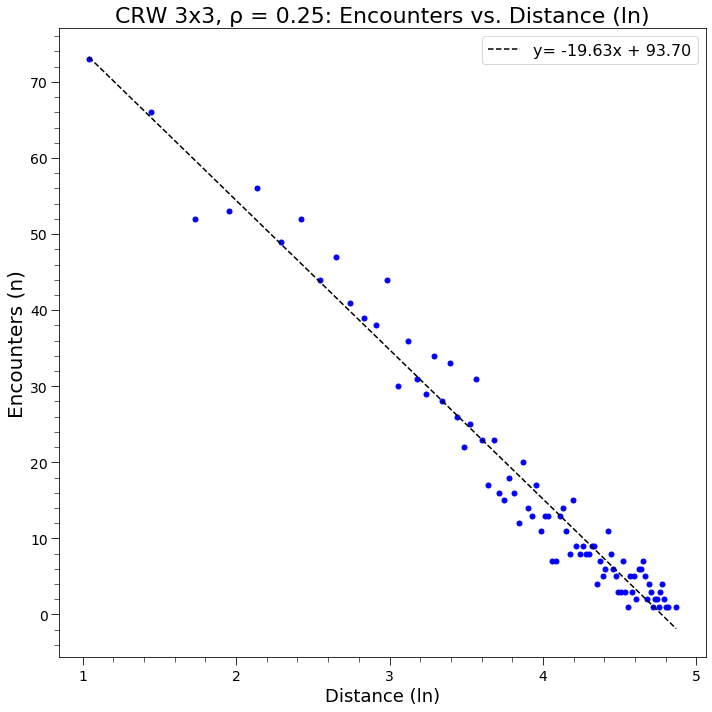

In [17]:
crw.printDecayGraph(x3, y3, '3x3, ' + chr(961) + ' = ' + str(rho))
crw.printSemiLogGraph(x3, y3, '3x3, ' + chr(961) + ' = ' + str(rho))

In [18]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x3ln, y3)
print(slope, intercept, r_value, p_value, std_err)

-19.629881397506082 93.69675301430166 -0.9817535423937589 4.660821483621056e-63 0.41240112238547394


d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128


slope = -19.73 (+/-) 0.49
y-intercept = 94.95 (+/-) 1.95


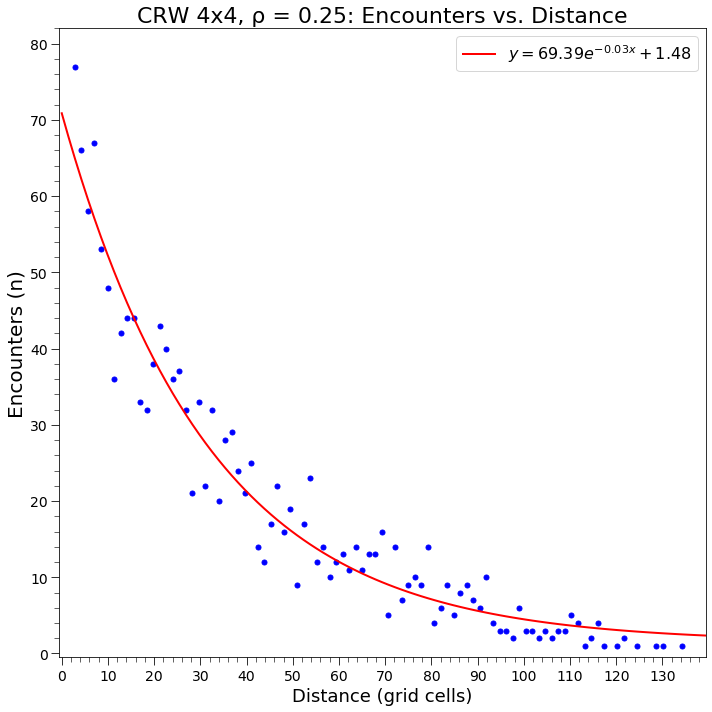

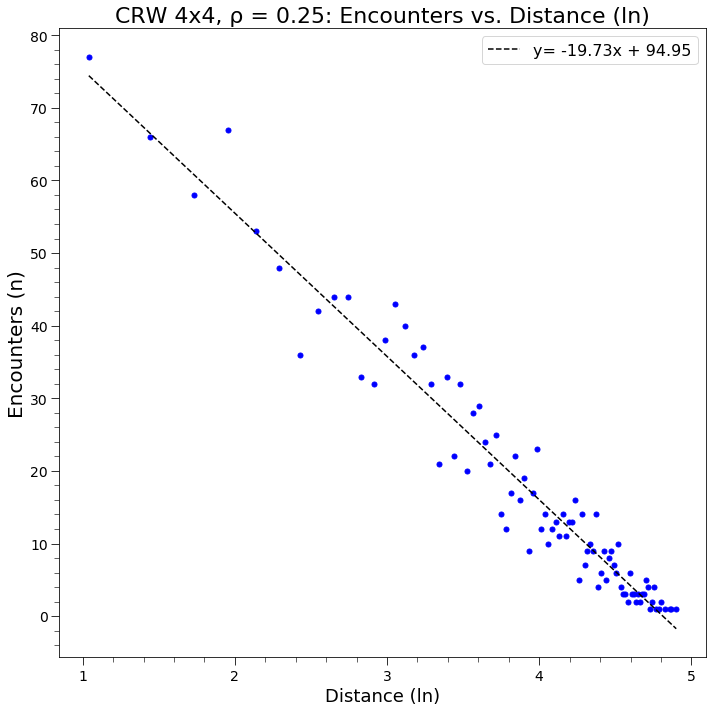

In [19]:
crw.printDecayGraph(x4, y4, '4x4, ' + chr(961) + ' = ' + str(rho))
crw.printSemiLogGraph(x4, y4, '4x4, ' + chr(961) + ' = ' + str(rho))

In [20]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x4ln, y4)
print(slope, intercept, r_value, p_value, std_err)

-19.728529436060228 94.94974437528651 -0.9746738674986064 1.0094214558798983e-57 0.48811066081688603


slope = -20.23 (+/-) 0.42

d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128



y-intercept = 98.52 (+/-) 1.70


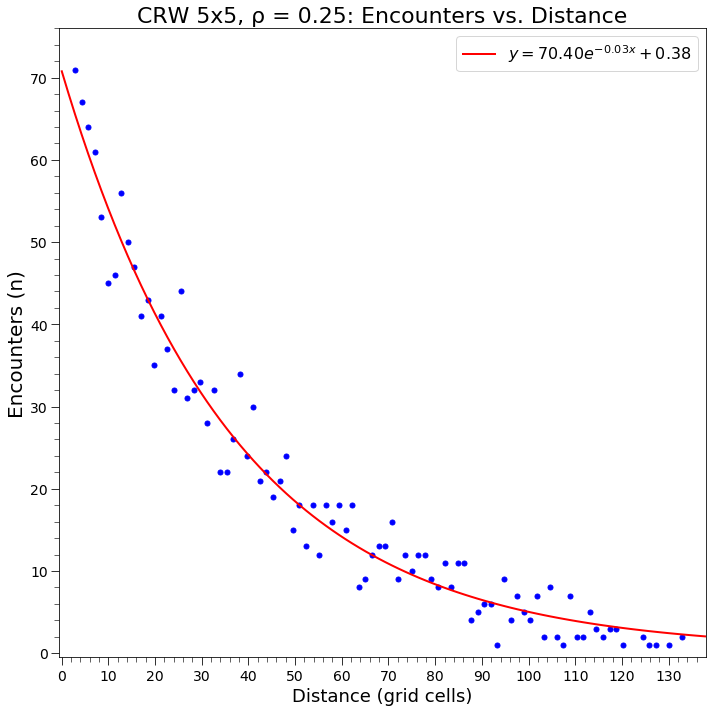

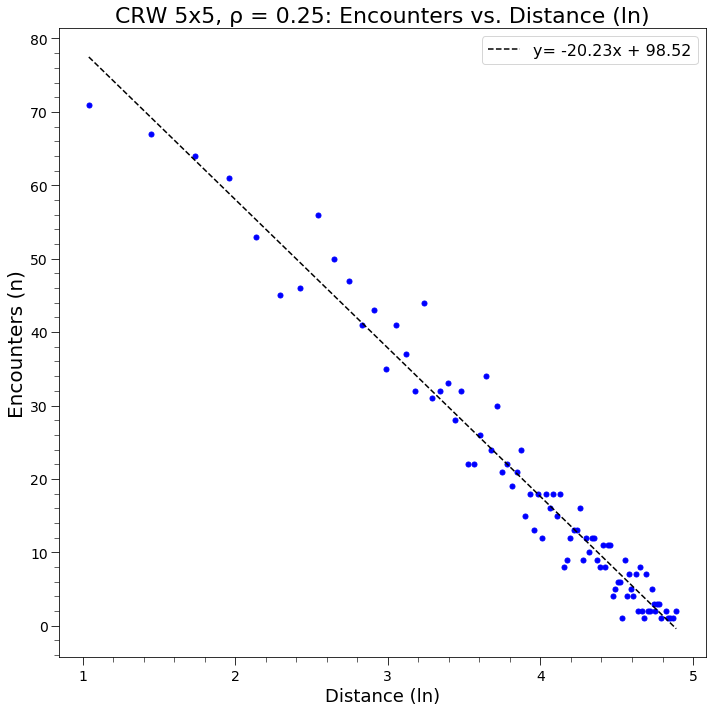

In [21]:
crw.printDecayGraph(x5, y5, '5x5, ' + chr(961) + ' = ' + str(rho))
crw.printSemiLogGraph(x5, y5, '5x5, ' + chr(961) + ' = ' + str(rho))

In [22]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x5ln, y5)
print(slope, intercept, r_value, p_value, std_err)

-20.230569071338273 98.52093883508495 -0.9814769137391158 3.1872753824680184e-64 0.42336949963874104


d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128


slope = -21.31 (+/-) 0.42
y-intercept = 103.26 (+/-) 1.69


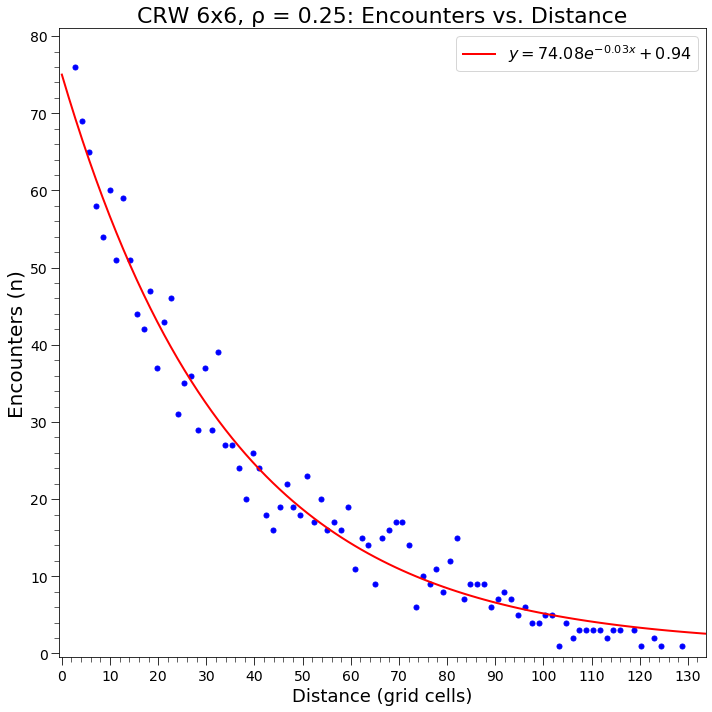

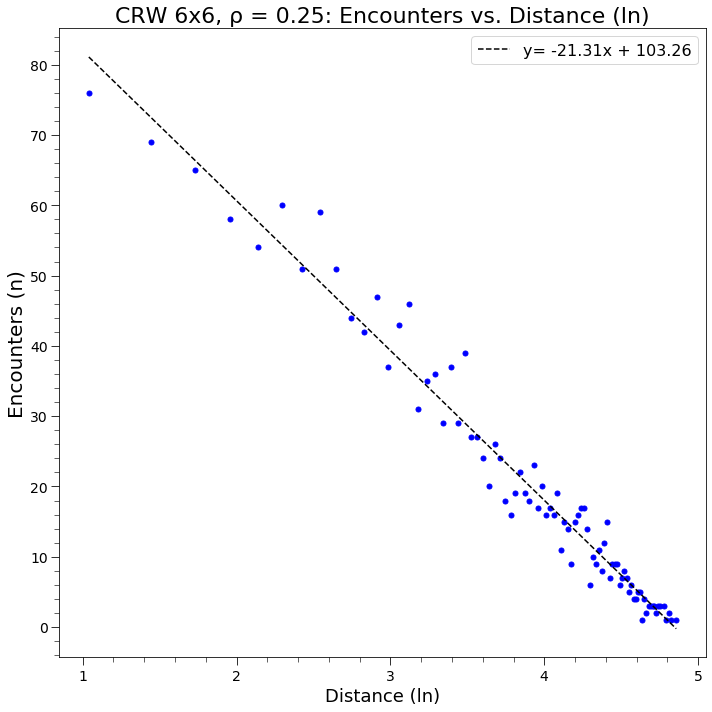

In [23]:
crw.printDecayGraph(x6, y6, '6x6, ' + chr(961) + ' = ' + str(rho))
crw.printSemiLogGraph(x6, y6, '6x6, ' + chr(961) + ' = ' + str(rho))

In [24]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x6ln, y6)
print(slope, intercept, r_value, p_value, std_err)

-21.307109286509668 103.2618884525152 -0.9837721813060142 1.866496338120872e-64 0.42400045646304474


d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128


slope = -22.24 (+/-) 0.48
y-intercept = 108.37 (+/-) 1.93


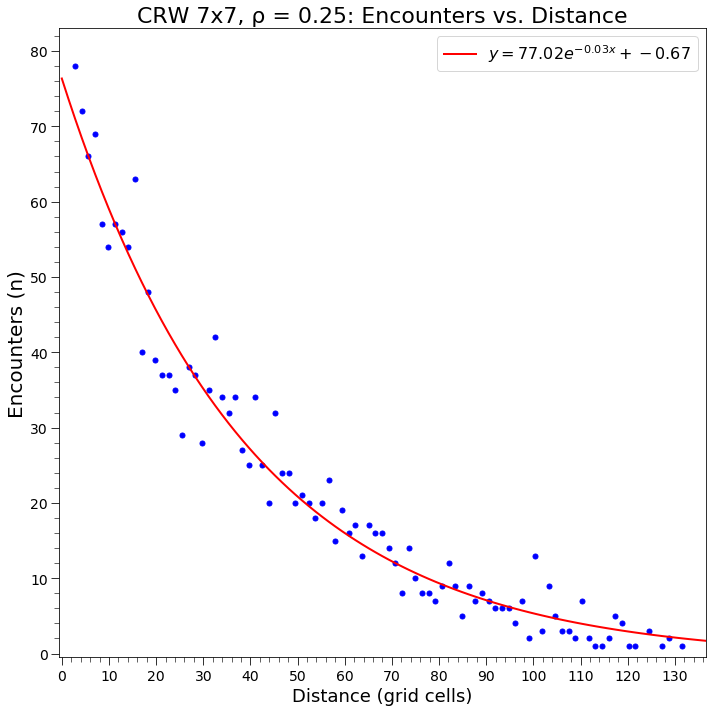

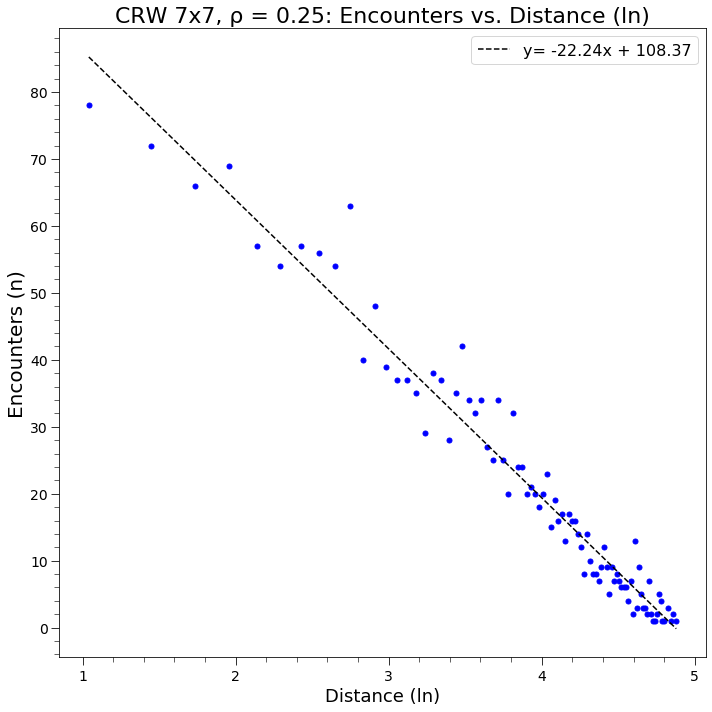

In [25]:
crw.printDecayGraph(x7, y7, '7x7, ' + chr(961) + ' = ' + str(rho))
crw.printSemiLogGraph(x7, y7, '7x7, ' + chr(961) + ' = ' + str(rho))

In [26]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x7ln, y7)
print(slope, intercept, r_value, p_value, std_err)


-22.243822846970115 108.37112590202912 -0.98033536144498 4.195997569715481e-63 0.48005112127700705


d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128


slope = -23.62 (+/-) 0.43
y-intercept = 114.14 (+/-) 1.74


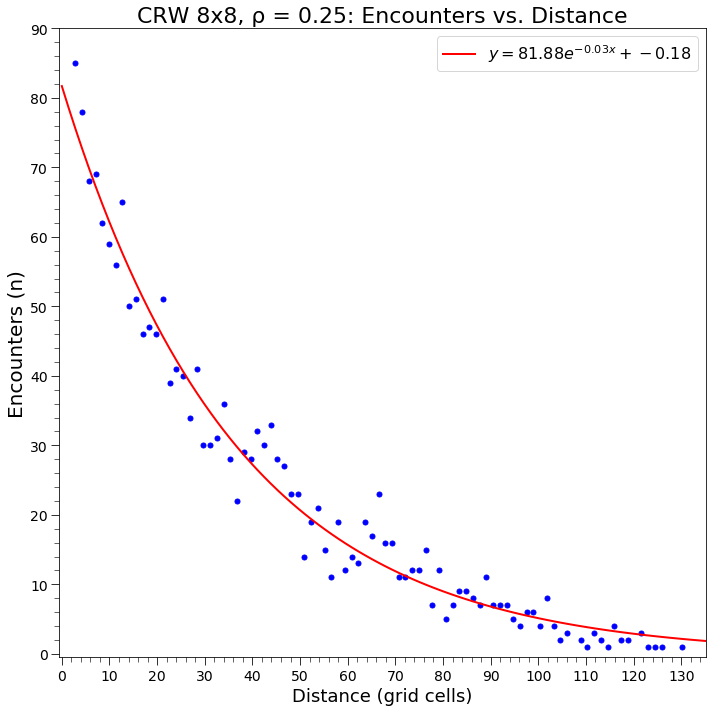

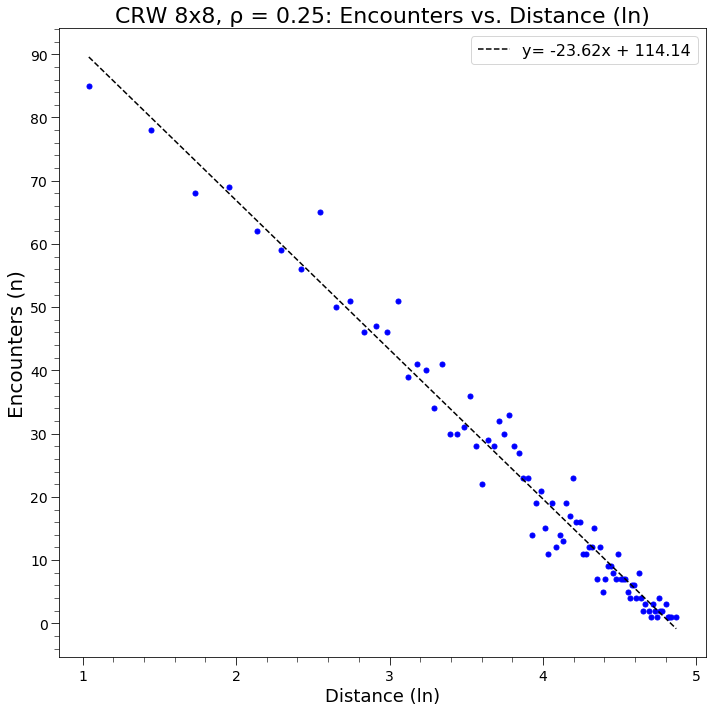

In [27]:
crw.printDecayGraph(x8, y8, '8x8, ' + chr(961) + ' = ' + str(rho))
crw.printSemiLogGraph(x8, y8, '8x8, ' + chr(961) + ' = ' + str(rho))

In [28]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x8ln, y8)
print(slope, intercept, r_value, p_value, std_err)

-23.619596862729782 114.13932128419091 -0.9859180300121956 8.38532961977648e-68 0.43454481841941733


d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in exp
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128
d:\dev\Python\CRW\src\CRWutils.py:434: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(x*k) + b            # TODO need dtype=np.float128


slope = -23.32 (+/-) 0.56
y-intercept = 113.18 (+/-) 2.24


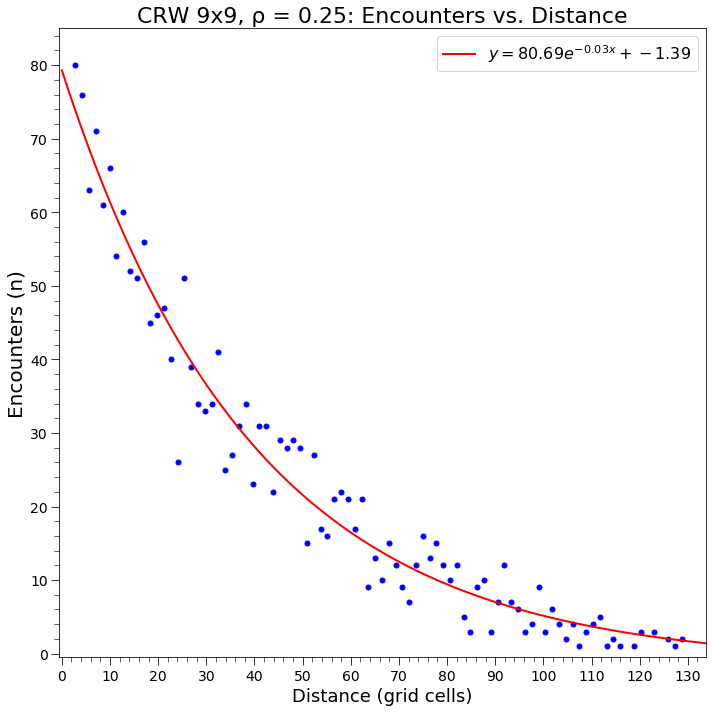

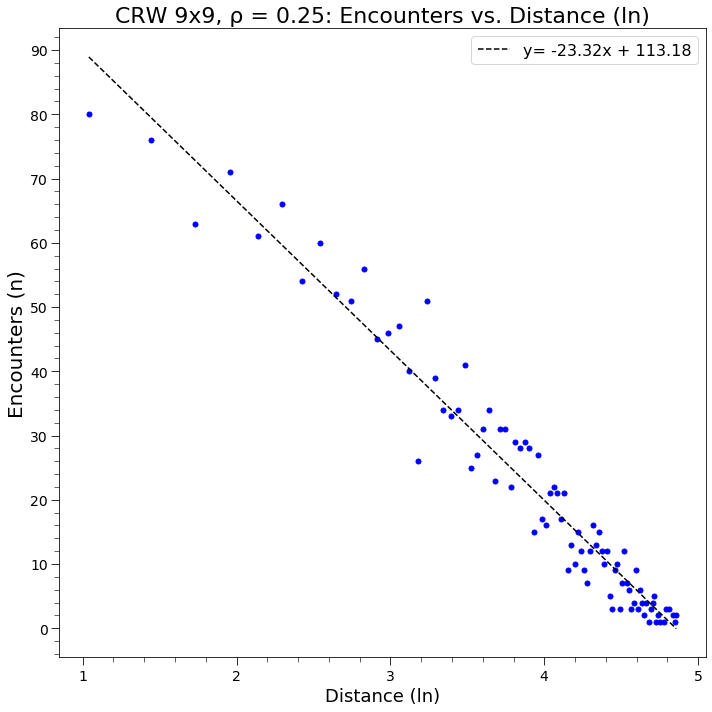

In [29]:
crw.printDecayGraph(x9, y9, '9x9, ' + chr(961) + ' = ' + str(rho))
crw.printSemiLogGraph(x9, y9, '9x9, ' + chr(961) + ' = ' + str(rho))

In [30]:
slope, intercept, r_value, p_value, std_err = crw.stats.linregress(x9ln, y9)
print(slope, intercept, r_value, p_value, std_err)

-23.315106378903195 113.18014095918569 -0.9763373102877215 2.617754548130875e-58 0.5601323319046664


In [31]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
import scipy as scipy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs

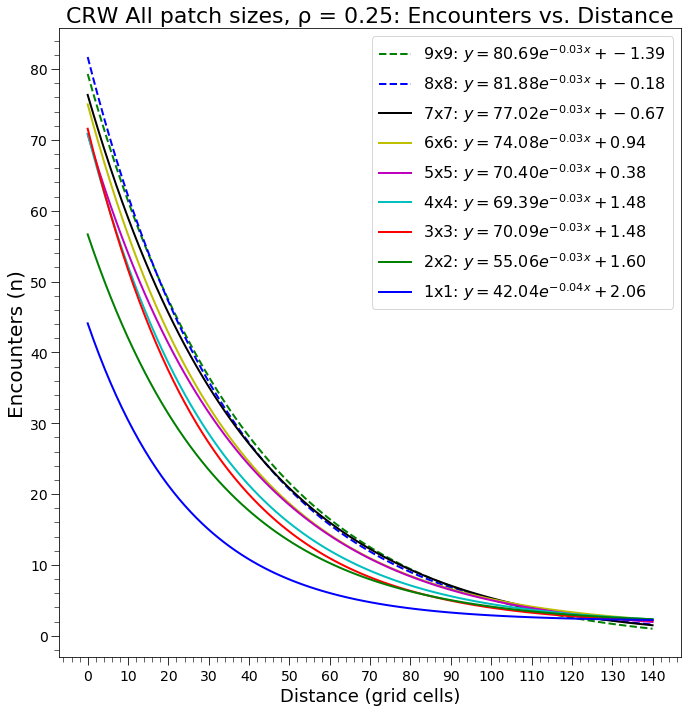

In [32]:
fig = plt.figure(figsize=(10,10))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

p9opt_exponential, p9cov_exponential = scipy.optimize.curve_fit(crw.exponential, p9['distance'], p9['tally'], p0=[1,-0.5, 1])
a = p9opt_exponential[0]
b = -p9opt_exponential[1]
c = p9opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'g--', linewidth=2, label=r'9x9: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

p8opt_exponential, p8cov_exponential = scipy.optimize.curve_fit(crw.exponential, p8['distance'], p8['tally'], p0=[1,-0.5, 1])
a = p8opt_exponential[0]
b = -p8opt_exponential[1]
c = p8opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'b--', linewidth=2, label=r'8x8: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

p7opt_exponential, p7cov_exponential = scipy.optimize.curve_fit(crw.exponential, p7['distance'], p7['tally'], p0=[1,-0.5, 1])
a = p7opt_exponential[0]
b = -p7opt_exponential[1]
c = p7opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'k-', linewidth=2, label=r'7x7: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

p6opt_exponential, p6cov_exponential = scipy.optimize.curve_fit(crw.exponential, p6['distance'], p6['tally'], p0=[1,-0.5, 1])
a = p6opt_exponential[0]
b = -p6opt_exponential[1]
c = p6opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'y-', linewidth=2, label=r'6x6: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

p5opt_exponential, p5cov_exponential = scipy.optimize.curve_fit(crw.exponential, p5['distance'], p5['tally'], p0=[1,-0.5, 1])
a = p5opt_exponential[0]
b = -p5opt_exponential[1]
c = p5opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'm-', linewidth=2, label=r'5x5: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

p4opt_exponential, p4cov_exponential = scipy.optimize.curve_fit(crw.exponential, p4['distance'], p4['tally'], p0=[1,-0.5, 1])
a = p4opt_exponential[0]
b = -p4opt_exponential[1]
c = p4opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'c-', linewidth=2, label=r'4x4: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

p3opt_exponential, p3cov_exponential = scipy.optimize.curve_fit(crw.exponential, p3['distance'], p3['tally'], p0=[1,-0.5, 1])
a = p3opt_exponential[0]
b = -p3opt_exponential[1]
c = p3opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'r-', linewidth=2, label=r'3x3: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

p2opt_exponential, p2cov_exponential = scipy.optimize.curve_fit(crw.exponential, p2['distance'], p2['tally'], p0=[1,-0.5, 1])
a = p2opt_exponential[0]
b = -p2opt_exponential[1]
c = p2opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'g-', linewidth=2, label=r'2x2: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

p1opt_exponential, p1cov_exponential = scipy.optimize.curve_fit(crw.exponential, p1['distance'], p1['tally'], p0=[1,-0.5, 1])
a = p1opt_exponential[0]
b = -p1opt_exponential[1]
c = p1opt_exponential[2]
x = np.linspace(0, 140, 100, endpoint = True)
y = (a * np.exp(-b*x)) + c
plt.plot(x, y, 'b-', linewidth=2, label=r'1x1: $y = %0.2fe^{-%0.2fx} + %0.2f$' % (a, b, c))    # plot the line

ax1.set_title('CRW All patch sizes, ' + chr(961) + ' = ' + str(rho) + ': Encounters vs. Distance', fontsize=22)
ax1.set_xlabel("Distance (grid cells)",  fontsize=18)
ax1.set_ylabel("Encounters (n)",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
plt.savefig('output/CRW_' + chr(961) + ' = ' + str(rho) + ' All_patches_encounter v distance.png')

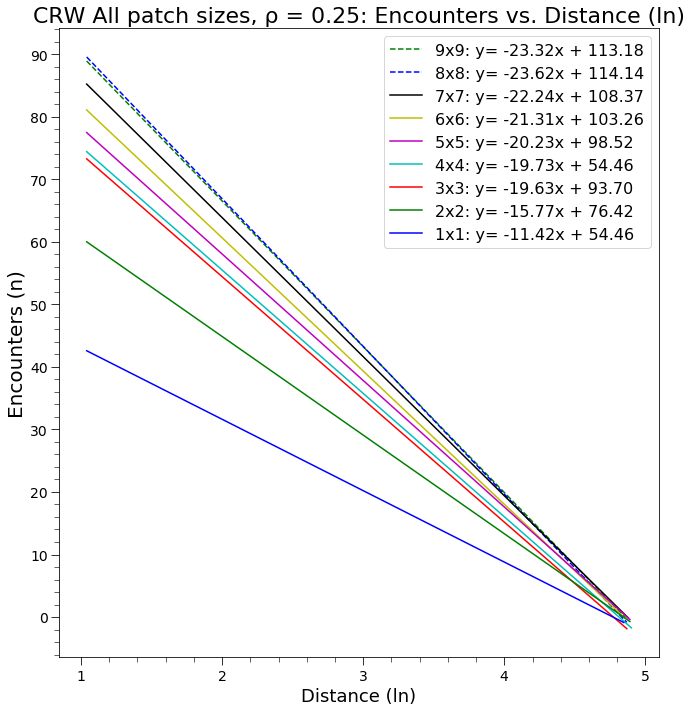

In [33]:
fig = plt.figure(figsize=(10,10))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

p1opt_linear, p1cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p1['distance']), p1['tally'], p0=[((75-25)/(44-2)), 0])
p1err_linear = np.sqrt(np.diag(p1cov_linear))

p2opt_linear, p2cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p2['distance']), p2['tally'], p0=[((75-25)/(44-2)), 0])
p2err_linear = np.sqrt(np.diag(p2cov_linear))

p3opt_linear, p3cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p3['distance']), p3['tally'], p0=[((75-25)/(44-2)), 0])
p3err_linear = np.sqrt(np.diag(p3cov_linear))

p4opt_linear, p4cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p4['distance']), p4['tally'], p0=[((75-25)/(44-2)), 0])
p4err_linear = np.sqrt(np.diag(p4cov_linear))

p5opt_linear, p5cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p5['distance']), p5['tally'], p0=[((75-25)/(44-2)), 0])
p5err_linear = np.sqrt(np.diag(p5cov_linear))

p6opt_linear, p6cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p6['distance']), p6['tally'], p0=[((75-25)/(44-2)), 0])
p6err_linear = np.sqrt(np.diag(p6cov_linear))

p7opt_linear, p7cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p7['distance']), p7['tally'], p0=[((75-25)/(44-2)), 0])
p7err_linear = np.sqrt(np.diag(p7cov_linear))

p8opt_linear, p8cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p8['distance']), p8['tally'], p0=[((75-25)/(44-2)), 0])
p8err_linear = np.sqrt(np.diag(p8cov_linear))

p9opt_linear, p9cov_linear = scipy.optimize.curve_fit(crw.linear, np.log(p9['distance']), p9['tally'], p0=[((75-25)/(44-2)), 0])
p9err_linear = np.sqrt(np.diag(p9cov_linear))


#ax1.plot(np.log(p9['distance']), p9['tally'], "bo", markersize=3)
ax1.plot(np.log(p9['distance']), crw.linear(np.log(p9['distance']), *p9opt_linear), 'g--', label="9x9: y= %0.2fx + %0.2f" % (p9opt_linear[0], p9opt_linear[1]))

#ax1.plot(np.log(p8['distance']), p8['tally'], "ro", markersize=3)
ax1.plot(np.log(p8['distance']), crw.linear(np.log(p8['distance']), *p8opt_linear), 'b--', label="8x8: y= %0.2fx + %0.2f" % (p8opt_linear[0], p8opt_linear[1]))

#ax1.plot(np.log(p7['distance']), p7['tally'], "yo", markersize=3)
ax1.plot(np.log(p7['distance']), crw.linear(np.log(p7['distance']), *p7opt_linear), 'k-', label="7x7: y= %0.2fx + %0.2f" % (p7opt_linear[0], p7opt_linear[1]))

#ax1.plot(np.log(p6['distance']), p6['tally'], "ro", markersize=3)
ax1.plot(np.log(p6['distance']), crw.linear(np.log(p6['distance']), *p6opt_linear), 'y-', label="6x6: y= %0.2fx + %0.2f" % (p6opt_linear[0], p6opt_linear[1]))

#ax1.plot(np.log(p5['distance']), p5['tally'], "ko", markersize=3)
ax1.plot(np.log(p5['distance']), crw.linear(np.log(p5['distance']), *p5opt_linear), 'm-', label="5x5: y= %0.2fx + %0.2f" % (p5opt_linear[0], p5opt_linear[1]))

#ax1.plot(np.log(p4['distance']), p4['tally'], "ro", markersize=3)
ax1.plot(np.log(p4['distance']), crw.linear(np.log(p4['distance']), *p4opt_linear), 'c-', label="4x4: y= %0.2fx + %0.2f" % (p4opt_linear[0], p1opt_linear[1]))

#ax1.plot(np.log(p3['distance']), p3['tally'], "go", markersize=3)
ax1.plot(np.log(p3['distance']), crw.linear(np.log(p3['distance']), *p3opt_linear), 'r-', label="3x3: y= %0.2fx + %0.2f" % (p3opt_linear[0], p3opt_linear[1]))

#ax1.plot(np.log(p2['distance']), p2['tally'], "ro", markersize=3)
ax1.plot(np.log(p2['distance']), crw.linear(np.log(p2['distance']), *p2opt_linear), 'g-', label="2x2: y= %0.2fx + %0.2f" % (p2opt_linear[0], p2opt_linear[1]))

#ax1.plot(np.log(p1['distance']), p1['tally'], "ro", markersize=3)
ax1.plot(np.log(p1['distance']), crw.linear(np.log(p1['distance']), *p1opt_linear), 'b-', label="1x1: y= %0.2fx + %0.2f" % (p1opt_linear[0], p1opt_linear[1]))


ax1.set_title('CRW All patch sizes, ' + chr(961) + ' = ' + str(rho) + ': Encounters vs. Distance (ln)', fontsize=22)
ax1.set_xlabel("Distance (ln)",  fontsize=18)
ax1.set_ylabel("Encounters (n)",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
plt.savefig('output/CRW_' + chr(961) + ' = ' + str(rho) + ' All_patches_semi_log.png')

# Comparing slopes and intercepts

In [34]:
# Based on Zar, J., (2010), Biostatistical Analysis, 5th Ed., Pearson, 
# Chap 18, "Comparing Two Slopes", pg. 387 - 391, equations 1 - 4
# and 
# Chap 18, "Comparing Two Elevations", pg. 391-395, equations 12 - 18

# First the slopes of two lines are compared. If Ho is rejected (that they are "estimating the same population slope", p 387), 
# then the intercepts are tested (Ho is that the lines are parallel.)

# If the Ho for slope comparison is rejected, the lines are significantly different (alpha = 0.05)
# If the Ho for slope comparison is not rejected, the lines are tested using the intercept/elevation test.  
# The Ho for the intercept test is that the lines are parallel
# If Ho for the second test is rejected, the lines are significantly different (alpha = 0.05)

In [35]:
# Create all the components needed for slope and intercept tests
r1 = crw.regression_components('1x1', x1ln, y1)
r2 = crw.regression_components('2x2', x2ln, y2)
r3 = crw.regression_components('3x3', x3ln, y3)
r4 = crw.regression_components('4x4', x4ln, y4)
r5 = crw.regression_components('5x5', x5ln, y5)
r6 = crw.regression_components('6x6', x6ln, y6)
r7 = crw.regression_components('7x7', x7ln, y7)
r8 = crw.regression_components('8x8', x8ln, y8)
r9 = crw.regression_components('9x9', x9ln, y9)

In [112]:
alpha = 0.01

In [113]:
crw.compare_slopes(r1, r2, alpha)

Slope comparison for significance: 1x1 vs 2x2
	Testing H₀: β₁ = β₂
	t = 7.461774 with v (df) = 163 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₃ = 2.606328
	H₀ is rejected


In [114]:
crw.compare_slopes(r1, r3, alpha)

Slope comparison for significance: 1x1 vs 3x3
	Testing H₀: β₁ = β₂
	t = 14.663168 with v (df) = 165 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₅ = 2.605954
	H₀ is rejected


In [115]:
crw.compare_slopes(r1, r4, alpha)

Slope comparison for significance: 1x1 vs 4x4
	Testing H₀: β₁ = β₂
	t = 13.351298 with v (df) = 166 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₆ = 2.605770
	H₀ is rejected


In [116]:
crw.compare_slopes(r1, r5, alpha)

Slope comparison for significance: 1x1 vs 5x5
	Testing H₀: β₁ = β₂
	t = 15.459881 with v (df) = 167 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₇ = 2.605589
	H₀ is rejected


In [117]:
crw.compare_slopes(r1, r6, alpha)

Slope comparison for significance: 1x1 vs 6x6
	Testing H₀: β₁ = β₂
	t = 17.393674 with v (df) = 164 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₄ = 2.606140
	H₀ is rejected


In [118]:
crw.compare_slopes(r1, r7, alpha)

Slope comparison for significance: 1x1 vs 7x7
	Testing H₀: β₁ = β₂
	t = 17.553856 with v (df) = 167 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₇ = 2.605589
	H₀ is rejected


In [119]:
crw.compare_slopes(r1, r8, alpha)

Slope comparison for significance: 1x1 vs 8x8
	Testing H₀: β₁ = β₂
	t = 21.124621 with v (df) = 165 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₅ = 2.605954
	H₀ is rejected


In [120]:
crw.compare_slopes(r1, r9, alpha)

Slope comparison for significance: 1x1 vs 9x9
	Testing H₀: β₁ = β₂
	t = 17.435729 with v (df) = 165 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₅ = 2.605954
	H₀ is rejected


In [121]:
crw.compare_slopes(r2, r3, alpha)

Slope comparison for significance: 2x2 vs 3x3
	Testing H₀: β₁ = β₂
	t = 6.366184 with v (df) = 168 and p-value = 0.000001
	t₀.₀₁₍₂₎,₁₆₈ = 2.605410
	H₀ is rejected


In [122]:
crw.compare_slopes(r2, r4, alpha)

Slope comparison for significance: 2x2 vs 4x4
	Testing H₀: β₁ = β₂
	t = 5.980764 with v (df) = 169 and p-value = 0.000002
	t₀.₀₁₍₂₎,₁₆₉ = 2.605233
	H₀ is rejected


In [123]:
crw.compare_slopes(r2, r5, alpha)

Slope comparison for significance: 2x2 vs 5x5
	Testing H₀: β₁ = β₂
	t = 7.267427 with v (df) = 170 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₇₀ = 2.605058
	H₀ is rejected


In [124]:
crw.compare_slopes(r2, r6, alpha)

Slope comparison for significance: 2x2 vs 6x6
	Testing H₀: β₁ = β₂
	t = 9.013163 with v (df) = 167 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₇ = 2.605589
	H₀ is rejected


In [125]:
crw.compare_slopes(r2, r7, alpha)

Slope comparison for significance: 2x2 vs 7x7
	Testing H₀: β₁ = β₂
	t = 9.870876 with v (df) = 170 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₇₀ = 2.605058
	H₀ is rejected


In [126]:
crw.compare_slopes(r2, r8, alpha)

Slope comparison for significance: 2x2 vs 8x8
	Testing H₀: β₁ = β₂
	t = 12.629210 with v (df) = 168 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₈ = 2.605410
	H₀ is rejected


In [127]:
crw.compare_slopes(r2, r9, alpha)

Slope comparison for significance: 2x2 vs 9x9
	Testing H₀: β₁ = β₂
	t = 10.523551 with v (df) = 168 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₆₈ = 2.605410
	H₀ is rejected


In [128]:
crw.compare_slopes(r3, r4, alpha)

Slope comparison for significance: 3x3 vs 4x4
	Testing H₀: β₁ = β₂
	t = 0.154172 with v (df) = 171 and p-value = 0.878542
	t₀.₀₁₍₂₎,₁₇₁ = 2.604886
	H₀ is not rejected
Intercept/elevation comparison for significance: 3x3 vs 4x4
	Testing H₀: The two population regression lines have the same elevation
	t = 1.613844 with v (df) = 171 and p-value = 0.117392
	t₀.₀₁₍₂₎,₁₇₁ = 2.604886
	H₀ is not rejected


In [129]:
crw.compare_slopes(r3, r5, alpha)

Slope comparison for significance: 3x3 vs 5x5
	Testing H₀: β₁ = β₂
	t = 1.015772 with v (df) = 172 and p-value = 0.318138
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is not rejected
Intercept/elevation comparison for significance: 3x3 vs 5x5
	Testing H₀: The two population regression lines have the same elevation
	t = 4.964653 with v (df) = 172 and p-value = 0.000028
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is rejected


In [130]:
crw.compare_slopes(r3, r6, alpha)

Slope comparison for significance: 3x3 vs 6x6
	Testing H₀: β₁ = β₂
	t = 2.836003 with v (df) = 169 and p-value = 0.008243
	t₀.₀₁₍₂₎,₁₆₉ = 2.605233
	H₀ is rejected


In [131]:
crw.compare_slopes(r3, r7, alpha)

Slope comparison for significance: 3x3 vs 7x7
	Testing H₀: β₁ = β₂
	t = 4.121415 with v (df) = 172 and p-value = 0.000287
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is rejected


In [132]:
crw.compare_slopes(r3, r8, alpha)

Slope comparison for significance: 3x3 vs 8x8
	Testing H₀: β₁ = β₂
	t = 6.659179 with v (df) = 170 and p-value = 0.000000
	t₀.₀₁₍₂₎,₁₇₀ = 2.605058
	H₀ is rejected


In [133]:
crw.compare_slopes(r3, r9, alpha)

Slope comparison for significance: 3x3 vs 9x9
	Testing H₀: β₁ = β₂
	t = 5.296900 with v (df) = 170 and p-value = 0.000011
	t₀.₀₁₍₂₎,₁₇₀ = 2.605058
	H₀ is rejected


In [134]:
crw.compare_slopes(r4, r5, alpha)

Slope comparison for significance: 4x4 vs 5x5
	Testing H₀: β₁ = β₂
	t = 0.777607 with v (df) = 173 and p-value = 0.443099
	t₀.₀₁₍₂₎,₁₇₃ = 2.604546
	H₀ is not rejected
Intercept/elevation comparison for significance: 4x4 vs 5x5
	Testing H₀: The two population regression lines have the same elevation
	t = 2.946544 with v (df) = 173 and p-value = 0.006281
	t₀.₀₁₍₂₎,₁₇₃ = 2.604546
	H₀ is rejected


In [135]:
crw.compare_slopes(r4, r6, alpha)

Slope comparison for significance: 4x4 vs 6x6
	Testing H₀: β₁ = β₂
	t = 2.436428 with v (df) = 170 and p-value = 0.021207
	t₀.₀₁₍₂₎,₁₇₀ = 2.605058
	H₀ is not rejected
Intercept/elevation comparison for significance: 4x4 vs 6x6
	Testing H₀: The two population regression lines have the same elevation
	t = 3.888218 with v (df) = 170 and p-value = 0.000541
	t₀.₀₁₍₂₎,₁₇₀ = 2.605058
	H₀ is rejected


In [136]:
crw.compare_slopes(r4, r7, alpha)

Slope comparison for significance: 4x4 vs 7x7
	Testing H₀: β₁ = β₂
	t = 3.674244 with v (df) = 173 and p-value = 0.000961
	t₀.₀₁₍₂₎,₁₇₃ = 2.604546
	H₀ is rejected


In [137]:
crw.compare_slopes(r4, r8, alpha)

Slope comparison for significance: 4x4 vs 8x8
	Testing H₀: β₁ = β₂
	t = 5.949540 with v (df) = 171 and p-value = 0.000002
	t₀.₀₁₍₂₎,₁₇₁ = 2.604886
	H₀ is rejected


In [138]:
crw.compare_slopes(r4, r9, alpha)

Slope comparison for significance: 4x4 vs 9x9
	Testing H₀: β₁ = β₂
	t = 4.831612 with v (df) = 171 and p-value = 0.000041
	t₀.₀₁₍₂₎,₁₇₁ = 2.604886
	H₀ is rejected


In [139]:
crw.compare_slopes(r5, r6, alpha)

Slope comparison for significance: 5x5 vs 6x6
	Testing H₀: β₁ = β₂
	t = 1.795994 with v (df) = 171 and p-value = 0.082922
	t₀.₀₁₍₂₎,₁₇₁ = 2.604886
	H₀ is not rejected
Intercept/elevation comparison for significance: 5x5 vs 6x6
	Testing H₀: The two population regression lines have the same elevation
	t = 1.053128 with v (df) = 171 and p-value = 0.300978
	t₀.₀₁₍₂₎,₁₇₁ = 2.604886
	H₀ is not rejected


In [140]:
crw.compare_slopes(r5, r7, alpha)

Slope comparison for significance: 5x5 vs 7x7
	Testing H₀: β₁ = β₂
	t = 3.145519 with v (df) = 174 and p-value = 0.003812
	t₀.₀₁₍₂₎,₁₇₄ = 2.604379
	H₀ is rejected


In [141]:
crw.compare_slopes(r5, r8, alpha)

Slope comparison for significance: 5x5 vs 8x8
	Testing H₀: β₁ = β₂
	t = 5.587019 with v (df) = 172 and p-value = 0.000005
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is rejected


In [142]:
crw.compare_slopes(r5, r9, alpha)

Slope comparison for significance: 5x5 vs 9x9
	Testing H₀: β₁ = β₂
	t = 4.407628 with v (df) = 172 and p-value = 0.000131
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is rejected


In [143]:
crw.compare_slopes(r6, r7, alpha)

Slope comparison for significance: 6x6 vs 7x7
	Testing H₀: β₁ = β₂
	t = 1.458507 with v (df) = 171 and p-value = 0.155447
	t₀.₀₁₍₂₎,₁₇₁ = 2.604886
	H₀ is not rejected
Intercept/elevation comparison for significance: 6x6 vs 7x7
	Testing H₀: The two population regression lines have the same elevation
	t = 2.671773 with v (df) = 171 and p-value = 0.012248
	t₀.₀₁₍₂₎,₁₇₁ = 2.604886
	H₀ is rejected


In [144]:
crw.compare_slopes(r6, r8, alpha)

Slope comparison for significance: 6x6 vs 8x8
	Testing H₀: β₁ = β₂
	t = 3.807964 with v (df) = 169 and p-value = 0.000672
	t₀.₀₁₍₂₎,₁₆₉ = 2.605233
	H₀ is rejected


In [145]:
crw.compare_slopes(r6, r9, alpha)

Slope comparison for significance: 6x6 vs 9x9
	Testing H₀: β₁ = β₂
	t = 2.852955 with v (df) = 169 and p-value = 0.007909
	t₀.₀₁₍₂₎,₁₆₉ = 2.605233
	H₀ is rejected


In [146]:
crw.compare_slopes(r7, r8, alpha)

Slope comparison for significance: 7x7 vs 8x8
	Testing H₀: β₁ = β₂
	t = 2.121933 with v (df) = 172 and p-value = 0.042509
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is not rejected
Intercept/elevation comparison for significance: 7x7 vs 8x8
	Testing H₀: The two population regression lines have the same elevation
	t = 0.697761 with v (df) = 172 and p-value = 0.490884
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is not rejected


In [147]:
crw.compare_slopes(r7, r9, alpha)

Slope comparison for significance: 7x7 vs 9x9
	Testing H₀: β₁ = β₂
	t = 1.454708 with v (df) = 172 and p-value = 0.156489
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is not rejected
Intercept/elevation comparison for significance: 7x7 vs 9x9
	Testing H₀: The two population regression lines have the same elevation
	t = 0.992481 with v (df) = 172 and p-value = 0.329172
	t₀.₀₁₍₂₎,₁₇₂ = 2.604715
	H₀ is not rejected


In [148]:
crw.compare_slopes(r8, r9, alpha)

Slope comparison for significance: 8x8 vs 9x9
	Testing H₀: β₁ = β₂
	t = 0.429571 with v (df) = 170 and p-value = 0.670683
	t₀.₀₁₍₂₎,₁₇₀ = 2.605058
	H₀ is not rejected
Intercept/elevation comparison for significance: 8x8 vs 9x9
	Testing H₀: The two population regression lines have the same elevation
	t = 0.384342 with v (df) = 170 and p-value = 0.703529
	t₀.₀₁₍₂₎,₁₇₀ = 2.605058
	H₀ is not rejected
